# Anomalías Estandarizadas

Bueno ya vimos las anomalías normales, entonces ahora toca ver las anomalías estandarizadas.

Es decir vamos a buscar ahora de una manera más fina, cómo encontrar extremos.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Cargar los datos
poblacion = pd.read_csv('Datos_Poblacion.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Vamos a ver qué países tienen una mortalidad infantil anormal

inf_mort = poblacion[['Country','Infant mortality']]

Bien, ya tenemos nuestra muestra, entonces vamos a tener que calcular dos cosas antes de obtener el Z-score

In [4]:
# El promedio
prom = np.mean(inf_mort['Infant mortality']).round(2)
# La desviación estándar
desvest = np.std(inf_mort['Infant mortality']).round(2)

In [5]:
inf_mort

,Country,Infant mortality
0,Algeria,31.00
1,Angola,191.19
2,Benin,85.00
3,Botswana,54.58
4,Burkina Faso,97.57
...,...,...
211,Paraguay,25.63
212,Peru,31.94
213,Suriname,23.57
214,Uruguay,11.95


Ok ya tenemos los dos elementos más importantes, entonces ahora toca utilizar
nuestra formulita.

In [6]:
# Z-score

anom_std = ((inf_mort['Infant mortality'] - prom) / desvest).round(2)
anom_std

0     -0.14
1      4.37
2      1.38
3      0.53
4      1.74
       ... 
211   -0.29
212   -0.11
213   -0.35
214   -0.67
215   -0.38
Name: Infant mortality, Length: 216, dtype: float64

Ya tenemos nuestro Z-score, o la anomalía estandarizada. Vamos a ver entonces cómo luce.

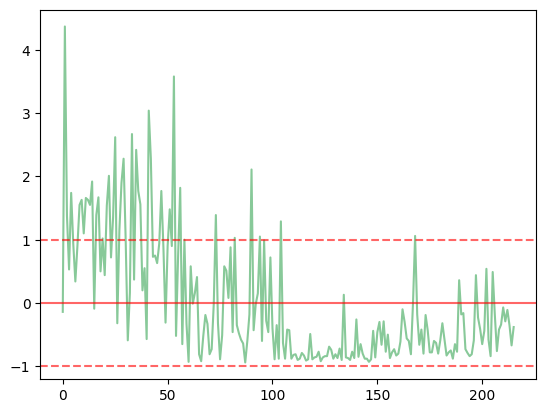

In [7]:
# Plot
x = np.arange(len(anom_std))

fig, ax = plt.subplots()
plt.plot(x, anom_std, color = '#88c999')
plt.axhline(y = 0, color = 'r', linestyle='-', alpha = 0.6)
plt.axhline(y = 1, color = 'r', linestyle='--', alpha = 0.6)
plt.axhline(y = -1, color = 'r', linestyle='--', alpha = 0.6)

# Que nos indica esta gráfica?

Bueno entonces como científicos, su labor es hacer preguntas. Vamos entonces a confirmar si es que hay algún país cuya mortalidad infantil sea menor a una desviación estándar, y qué países tienen una mortalidad por arriba de una.

In [8]:
# Bueno primero, evaluemos si hay algún país con una mortalidad muy baja

print(np.min(anom_std))  # -0.94

# Tomemos ese que es lo más cercano
low = np.min(anom_std)
print(low)

-0.94
-0.94


In [9]:
# Seleccionar los paises que tienen una mortalidad por arriba de una desviacion estandar

high = anom_std[anom_std > 1] # 36 países

print(np.max(anom_std))
print(len(high))
high

4.37
36


1      4.37
2      1.38
4      1.74
8      1.55
9      1.63
10     1.10
11     1.66
12     1.63
13     1.55
14     1.92
16     1.39
17     1.67
19     1.02
21     1.54
22     2.01
24     1.36
25     2.62
27     1.15
28     1.90
29     2.28
33     2.67
35     2.42
36     1.77
37     1.56
41     3.04
42     2.28
47     1.77
51     1.48
53     3.58
56     1.82
73     1.39
82     1.03
90     2.11
94     1.05
104    1.29
168    1.06
Name: Infant mortality, dtype: float64

In [ ]:
# Encuentren qué países corresponden a los valores que encontraron

#high_df =

#low_df =


SyntaxError: invalid syntax (<ipython-input-13-138f484fe859>, line 3)

In [10]:
inf_mort['Desvast'] = anom_std #para agregar una columna al data frame
#dd previo #nombre     #variable que se está agrgando
            #de la columna

<ipython-input-10-46eceff28f4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_mort['Desvast'] = anom_std #para agregar una columna al data frame


In [11]:
df1 = inf_mort[(inf_mort['Desvast']>1) & (inf_mort['Desvast']<4.5)]
df1

,Country,Infant mortality,Desvast
1,Angola,191.19,4.37
2,Benin,85.00,1.38
4,Burkina Faso,97.57,1.74
8,Central African Republic,91.00,1.55
9,Chad,93.82,1.63
10,Comoros,74.93,1.10
11,Democratic Republic of the Congo,94.69,1.66
12,Republic of the Congo,93.86,1.63
13,Côte d'Ivoire,90.83,1.55
14,Djibouti,104.13,1.92


In [12]:
des = df1['Desvast']
paises = df1['Country']

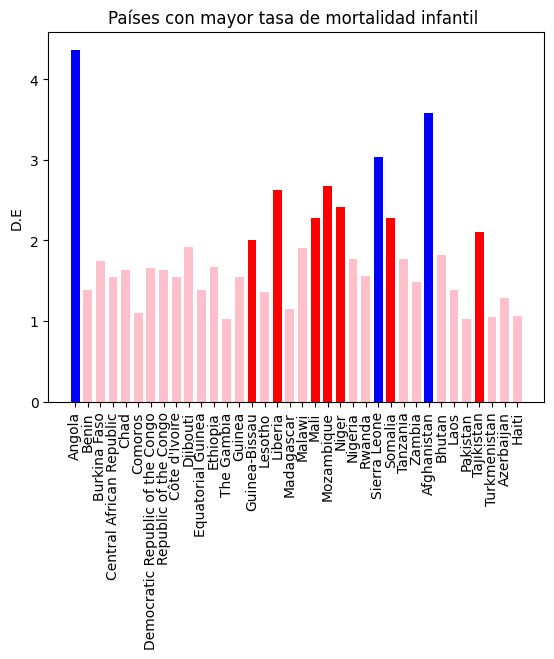

In [13]:
colores3 = []
for ii in range(len(des)):
  if des.iloc[ii] > 3:
    color3 = 'blue'
  elif des.iloc[ii] >2 and des.iloc[ii]<3:
    color3 = 'red'
  elif des.iloc[ii]<2:
    color3 = 'pink'
  colores3.append(color3)
fig, ax = plt.subplots()
plt.bar(paises, des, color = colores3, width = 0.7);
plt.title('Países con mayor tasa de mortalidad infantil ');
plt.ylabel('D.E');
plt.xticks(rotation=90);

Como pueden observar, las anomalías estandarizadas dan una nueva perspectiva de cómo se están comportando los datos y ver de una manera más objetiva cuáles serían los extremos de nuestros datos.

In [14]:
# Ejercicio para ustedes :)

# Bueno aún no, hay que analizar algo

# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Cargar los datos
landings = pd.read_csv('Meteorite_Landings.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Contar el número de impactos por año

meteorites = landings[['name','year' ]]

#count = meteorites['year'].value_counts()
count = meteorites.groupby('year').count().reset_index()
print(count)

       year  name
0     860.0     1
1     920.0     1
2    1399.0     1
3    1490.0     1
4    1491.0     1
..      ...   ...
260  2010.0  1005
261  2011.0   713
262  2012.0   234
263  2013.0    11
264  2101.0     1

[265 rows x 2 columns]


0         1
1         1
2         1
3         1
4         1
       ... 
260    1005
261     713
262     234
263      11
264       1
Name: name, Length: 265, dtype: int64

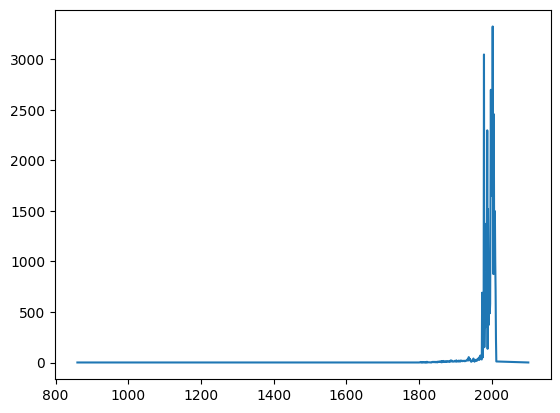

In [150]:
# Ploteen primeramente todos los impactos de meteoritos por año
años = count['year']
y = count['name']
fig, ax = plt.subplots()
plt.plot(años, y)
y

In [28]:
# Obtener las anomalías

media = np.mean(y) # 171.42
desvest =  np.std(y)# 504.59
#media2 = n

anom = y - media
z_score = y - media / desvest
z_score

0         0.660289
1         0.660289
2         0.660289
3         0.660289
4         0.660289
          ...     
260    1004.660289
261     712.660289
262     233.660289
263      10.660289
264       0.660289
Name: name, Length: 265, dtype: float64

Text(0.5, 1.0, 'Anomalías de impactos por Año')

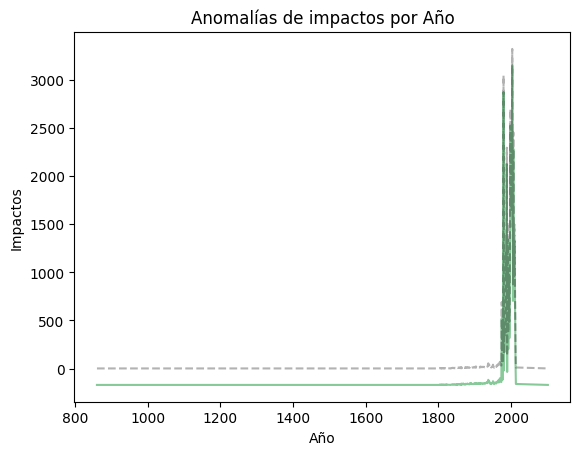

In [29]:
# Hacer los plots

fig, ax = plt.subplots()
plt.plot(count['year'], anom, color = '#88c999')
plt.plot(count['year'], count['name'], color = 'k', linestyle = '--', alpha = 0.3)
plt.ylabel('Impactos')
plt.xlabel('Año')
plt.title('Anomalías de impactos por Año')

Text(0.5, 1.0, 'Anomalías Estandarizadas de impactos por Año')

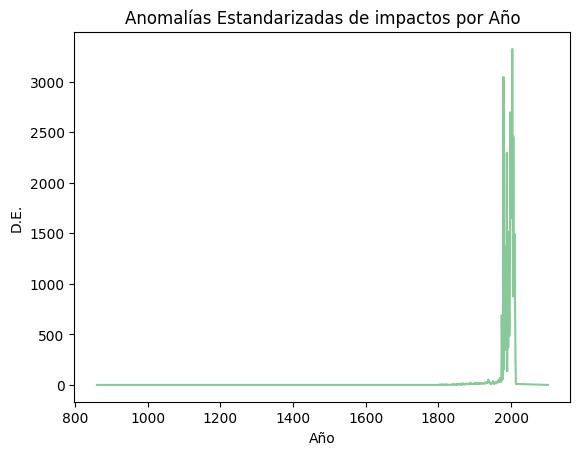

In [30]:
# Plot de la anomalía estandarizada

fig, ax = plt.subplots()
plt.plot(count['year'], z_score, color = '#88c999')
#plt.plot(count['year'], count['name'], color = 'k', linestyle = '--', alpha = 0.3, zorder = 0)
plt.ylabel('D.E.')
plt.xlabel('Año')
plt.title('Anomalías Estandarizadas de impactos por Año')

Ok, analicen lo que ocurre. Al tener una gran cantidad de datos con valor ~1, nuestros datos se están sesgando.
En este tipo de casos tenemos que analizar si realmente nos está aportando información todos esos valores ~1 o si podemos prescindir de ellos. En este caso supongamos que podemos quitarlos. Es aquí donde comienza su trabajo.

In [ ]:
# De toda la base completa utilicen los datos desde 1950 - 2012
# Obtengan las anomalías y las anomalías estandarizadas de la cantidad de meteoritos que han caído
# Nota: averigüen cómo se usa ax.fill_between()

In [155]:
df2 = landings[(landings['year']>= 1950) & (landings['year']<= 2012)]
df2

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
10,Aioun el Atrouss,423,Valid,Diogenite-pm,1000.0,Fell,1974.0,16.39806,-9.57028,"(16.39806, -9.57028)"
15,Akwanga,432,Valid,H,3000.0,Fell,1959.0,8.91667,8.43333,"(8.91667, 8.43333)"
...,...,...,...,...,...,...,...,...,...,...
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [156]:
count2 = df2['year'].value_counts().reset_index()
años2 = count2['year']
y2 = count2['count']

In [158]:
# Obtener las anomalías

media2 = np.mean(y2)
desvest2 =  np.std(y2)

anom2 = y2 - media2
z_score2 = y2 - media2 / desvest2
desvest2

844.0119369178755

Text(0.5, 1.0, 'Anomalías de impactos por Año')

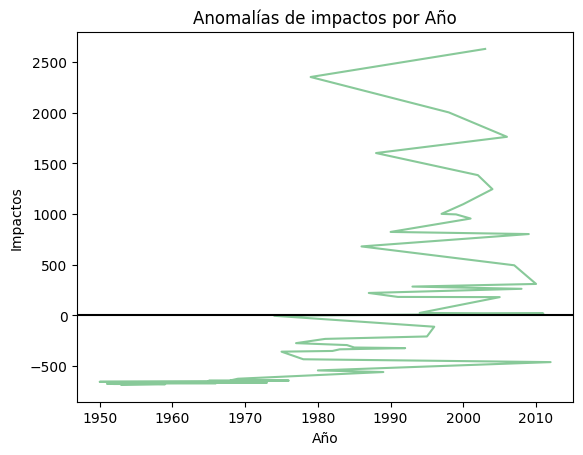

In [159]:
# Plot de la anomalía estandarizada
fig, ax = plt.subplots()
plt.plot(años2, anom2, color = '#88c999')
plt.axhline(y = 0, c = 'k')
#ax.fill_between(años3, anom2, y= 0)
plt.ylabel('Impactos')
plt.xlabel('Año')
plt.title('Anomalías de impactos por Año')